<a href="https://colab.research.google.com/github/Hasnat65/thesis42/blob/master/dristy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [272]:
import zipfile
import random
import tensorflow as tf
from tensorflow import keras
import h5py
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import scipy
import matplotlib.cm as cm
%matplotlib inline
import json
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob
from sklearn.model_selection import train_test_split

In [273]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [274]:
### From drive 
local_zip = '/content/drive/MyDrive/Colab_Project/dristy_dataset.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('sample_data/content')
zip_ref.close()

In [275]:
def load_data(data_path, target_size=(224,224)):
    img_arr_img = []
    filelist_img = glob.glob(data_path+"*.png")
    image_paths = sorted(filelist_img)
    
    for image_path in image_paths:
        try:
            image = cv2.imread(image_path)
            image = cv2.resize(image, dsize=(224,224))
            #interpolation=cv2.INTER_CUBIC) #/255.0
            #cv2.normalize(image, image, 0, 255, cv2.NORM_MINMAX)
            img_arr_img.append(image)
        except (RuntimeError, TypeError,NameError) as e:
            print(e)
            pass
    return np.asarray(img_arr_img), image_paths

In [276]:
path_advance_glaucoma= '/content/sample_data/content/glaucomas/'
path_normal_control = '/content/sample_data/content/normal/'

In [277]:
path_advance_glaucoma

'/content/sample_data/content/glaucomas/'

In [278]:
X_advance_glaucoma, filenames_advance_glaucoma= load_data(path_advance_glaucoma)
X_normal_control, filenames_normal_control= load_data(path_normal_control)

In [279]:
X_normal_control.shape

(31, 224, 224, 3)

In [280]:
# We stack vertically X_infected and X_uninfected to make the data tensor X
X = np.vstack((X_advance_glaucoma, X_normal_control))
# Let's create the labels vector
# 0 stands for  infected
# 1 stands for  not infected
labels = [0]*X_advance_glaucoma.shape[0] + [1]*X_normal_control.shape[0]

In [281]:
X

array([[[[1, 0, 1],
         [4, 2, 4],
         [3, 1, 4],
         ...,
         [3, 1, 3],
         [2, 0, 2],
         [3, 1, 3]],

        [[2, 0, 2],
         [3, 1, 3],
         [2, 0, 2],
         ...,
         [2, 0, 2],
         [2, 0, 3],
         [2, 0, 2]],

        [[3, 1, 3],
         [3, 1, 4],
         [2, 0, 2],
         ...,
         [2, 0, 2],
         [3, 1, 3],
         [3, 1, 3]],

        ...,

        [[3, 1, 3],
         [3, 1, 4],
         [4, 2, 4],
         ...,
         [2, 0, 3],
         [4, 2, 5],
         [2, 0, 2]],

        [[3, 1, 3],
         [4, 2, 5],
         [3, 1, 3],
         ...,
         [4, 2, 4],
         [1, 0, 1],
         [4, 2, 4]],

        [[4, 2, 4],
         [3, 1, 3],
         [4, 2, 5],
         ...,
         [2, 0, 2],
         [3, 1, 3],
         [2, 0, 2]]],


       [[[3, 1, 4],
         [3, 1, 3],
         [3, 1, 3],
         ...,
         [2, 0, 2],
         [2, 0, 2],
         [3, 1, 4]],

        [[2, 0, 3],
         [3,

In [282]:
# We need to separate the data into train and test arrays 
X_train, X_test, y_train, y_test = train_test_split(X,labels,test_size=0.2,random_state=50)

In [283]:
X_test.shape

(21, 224, 224, 3)

In [284]:
import numpy as np
y_train=np.array(y_train)
print(y_train.shape)
print(y_train)

(80,)
[0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 0 1 0 0 1 0]


In [285]:
import numpy as np
y_test=np.array(y_test)
print(y_test.shape)
print(y_test)

(21,)
[0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


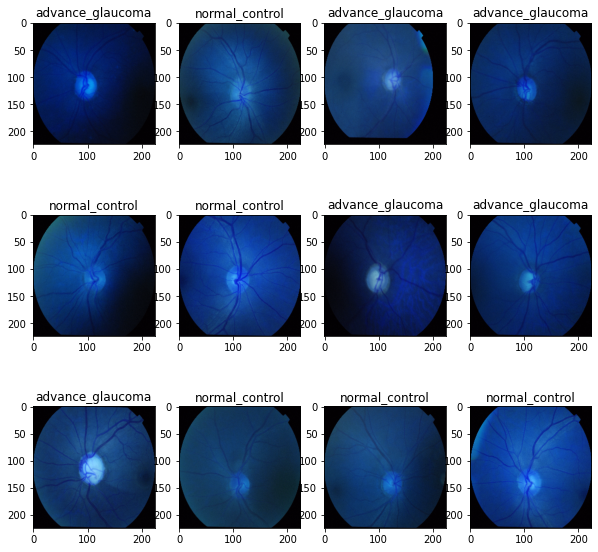

In [286]:
fig=plt.figure(figsize=(10,10))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
    if y_train[i] == 0:
        plt.title('advance_glaucoma')
    else:
        plt.title('normal_control')
    
plt.show()

In [287]:
from keras import backend as K


In [288]:
IMG_CHANNELS=3
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [289]:
if K.image_data_format() == 'channels_first':
    input_shape = (IMG_CHANNELS, IMG_WIDTH, IMG_HEIGHT)
else:
    input_shape = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

In [290]:
#Image Data augumentation
datagen = ImageDataGenerator(#rotation_range=15,
                             width_shift_range=0.2,
                              height_shift_range=0.2,
                          #   horizontal_flip=True,
                             #added
                             rotation_range = 90,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                             
                             
                             )
datagen.fit(X_train)

In [291]:
def create_model(input_shape, with_summary):
    wd = 0.0001
    model = Sequential()
    model.add(Conv2D(64, kernel_size=5, padding="same", input_shape=input_shape, activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    #model.add(Conv2D(32, kernel_size=3, padding="same", activation = 'relu', kernel_regularizer=regularizers.l2(wd)))
    #model.add(BatchNormalization())
   #model.add(Dropout(0.1))
    
    #model.add(Conv2D(128, kernel_size=3, padding="valid", activation = 'relu',kernel_regularizer=regularizers.l2(wd)))
    #model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.1))

    model.add(Flatten())
    model.add(Dense(units=1000, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(units=10, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Dense(units=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Dense(1))
    model.add(Activation("sigmoid"))


    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    
    if with_summary:
        model.summary()

    return model
  


In [292]:
def lr_schedule(epoch):
  lrate = 0.001
  if epoch > 75:
    lrate = 0.00001
  if epoch > 100:
    lrate = 0.00000001
  return lrate

In [293]:
print(lr_schedule)

<function lr_schedule at 0x7f388c006268>


In [294]:
# Train the CNN Model
from keras import regularizers
from keras.callbacks import LearningRateScheduler
input_shape = (224, 224, 3)
model = create_model(input_shape=input_shape, with_summary=False)
history = model.fit(X_train, y_train,batch_size=4,epochs=50,validation_data=(X_test,y_test), callbacks=[LearningRateScheduler(lr_schedule)],verbose=1)
print(model.evaluate(X_test, y_test))

Epoch 1/50
20/20 [==============================] - 1s 29ms/step - loss: 0.7750 - accuracy: 0.6125 - val_loss: 9.8948 - val_accuracy: 0.3333
Epoch 2/50
20/20 [==============================] - 0s 14ms/step - loss: 0.7756 - accuracy: 0.6375 - val_loss: 1.3362 - val_accuracy: 0.8095
Epoch 3/50
20/20 [==============================] - 0s 15ms/step - loss: 0.6373 - accuracy: 0.6625 - val_loss: 1.8954 - val_accuracy: 0.6190
Epoch 4/50
20/20 [==============================] - 0s 14ms/step - loss: 0.5943 - accuracy: 0.7250 - val_loss: 0.5545 - val_accuracy: 0.8095
Epoch 5/50
20/20 [==============================] - 0s 14ms/step - loss: 0.6546 - accuracy: 0.6875 - val_loss: 0.9972 - val_accuracy: 0.5238
Epoch 6/50
20/20 [==============================] - 0s 14ms/step - loss: 0.7121 - accuracy: 0.6000 - val_loss: 4.2760 - val_accuracy: 0.1905
Epoch 7/50
20/20 [==============================] - 0s 14ms/step - loss: 0.6707 - accuracy: 0.6750 - val_loss: 2.6107 - val_accuracy: 0.3333
Epoch 8/50
20

In [295]:
#Saving - json file & .h5
model_json = model.to_json()

with open('model.json','w') as json_file:
  json_file.write(model_json)
model.save_weights('origamodel.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


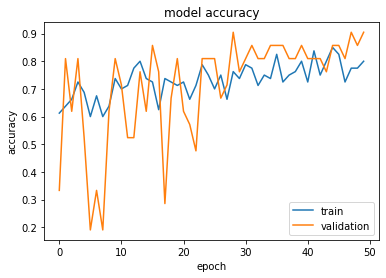

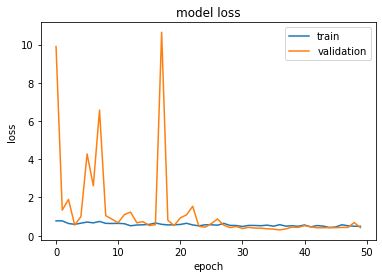

In [296]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [297]:
# Detrimine the predictions 
import numpy as np
predictions = model.predict(X_test)
predictions=np.array(predictions)
print(predictions.shape)
print(predictions)

(21, 1)
[[0.24902582]
 [0.21757819]
 [0.13704823]
 [0.02392009]
 [0.17615484]
 [0.65700364]
 [0.08583568]
 [0.588896  ]
 [0.11784381]
 [0.037849  ]
 [0.02548812]
 [0.2767932 ]
 [0.02166186]
 [0.07736716]
 [0.01820192]
 [0.20280977]
 [0.03597357]
 [0.06521425]
 [0.42144135]
 [0.01418544]
 [0.2590074 ]]


In [298]:
model.test_on_batch(X_test, y_test)
model.metrics_names

['loss', 'accuracy']

In [299]:
history 

In [300]:
history.history

{'accuracy': [0.612500011920929,
  0.637499988079071,
  0.6625000238418579,
  0.7250000238418579,
  0.6875,
  0.6000000238418579,
  0.675000011920929,
  0.6000000238418579,
  0.637499988079071,
  0.737500011920929,
  0.699999988079071,
  0.7124999761581421,
  0.7749999761581421,
  0.800000011920929,
  0.737500011920929,
  0.7250000238418579,
  0.625,
  0.737500011920929,
  0.7250000238418579,
  0.7124999761581421,
  0.7250000238418579,
  0.6625000238418579,
  0.7124999761581421,
  0.7875000238418579,
  0.75,
  0.699999988079071,
  0.75,
  0.6625000238418579,
  0.762499988079071,
  0.737500011920929,
  0.7875000238418579,
  0.7749999761581421,
  0.7124999761581421,
  0.75,
  0.737500011920929,
  0.824999988079071,
  0.7250000238418579,
  0.75,
  0.762499988079071,
  0.800000011920929,
  0.7250000238418579,
  0.8374999761581421,
  0.75,
  0.800000011920929,
  0.8500000238418579,
  0.824999988079071,
  0.7250000238418579,
  0.7749999761581421,
  0.7749999761581421,
  0.800000011920929],
 

In [301]:
Y_pred = model.predict_classes(X_test)
print(np.array(Y_pred ))

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [302]:
from sklearn.metrics import accuracy_score
print('The accuracy obtained on the test set is:', accuracy_score(Y_pred,y_test))

The accuracy obtained on the test set is: 0.9047619047619048


In [303]:
accuracy_score(y_test, Y_pred,normalize=True)

0.9047619047619048

In [304]:
import seaborn as sns
def draw_confusion_matrix(true,preds):
  conf_matx = confusion_matrix(true, preds)
  sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
  plt.show()

In [305]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Y_pred))

[[17  0]
 [ 2  2]]


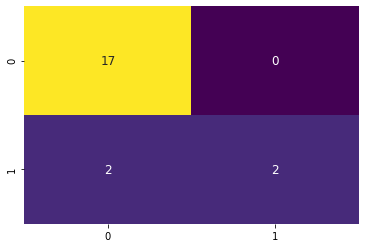

Confusion Matrix
                  precision    recall  f1-score   support

Advance Glaucoma       0.89      1.00      0.94        17
  Normal Control       1.00      0.50      0.67         4

        accuracy                           0.90        21
       macro avg       0.95      0.75      0.81        21
    weighted avg       0.91      0.90      0.89        21



In [306]:

from sklearn.metrics import classification_report 
draw_confusion_matrix(y_test,Y_pred)
print('Confusion Matrix')
target_names = ['Advance Glaucoma', 'Normal Control']
print(classification_report(y_test, Y_pred, target_names=target_names))

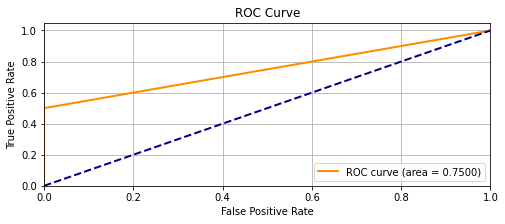

In [307]:
# Setup
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

# Get ROC curve FPR and TPR from true labels vs score values
fpr, tpr, _ = roc_curve(y_test, Y_pred)
# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)
# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(y_test, Y_pred)
plt.figure(figsize=(8, 3))
plt.subplot(1,1,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

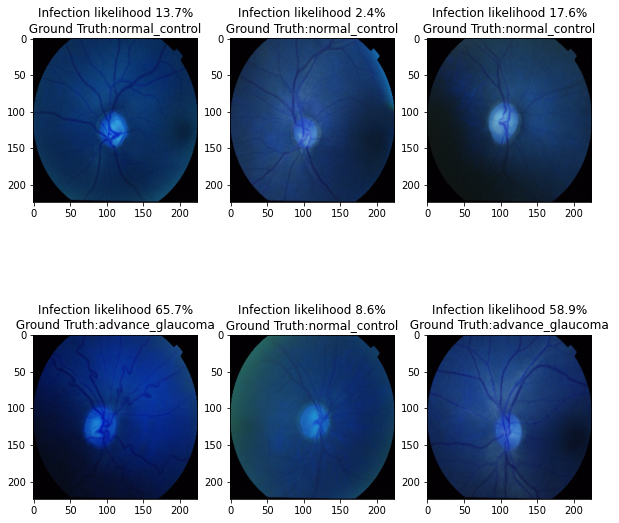

In [308]:
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 2
random_number = np.random.randint(0,X_test.shape[0]-16)#26 chilo ekhane
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[i+random_number])
    gt = ['normal_control', 'advance_glaucoma']
    plt.title('Infection likelihood {:.1%}\n Ground Truth:{} '.format(float(predictions[i+random_number]), gt[y_test[i+random_number]]))
    
plt.show()